### Imports

In [44]:
import os 
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 

### Loading opinions from .json files

In [45]:
print(*[filename.split(".")[0] for filename in os.listdir("./opinions")], sep="\n")

117109370
158184470
84514582


In [46]:
product_id = input("Enter product code, please: ")

In [47]:
opinions = pd.read_json(f"./opinions/{product_id}.json")
opinions 

,opinion_id,author,recommendation,stars,content_pl,pros_pl,cons_pl,vote_yes,vote_no,published,purchased,content_en,pros_en,cons_en
0,12535429,g...6,NaN,3.0,Instalacja łatwa. Oprogramowanie HP Smart bezp...,"[czyste napełnianie atramentem, niski koszt wy...",[jakość wydruków],19,3,2020-05-28 08:02:51,2020-05-04 22:29:44,Easy installation. HP Smart software trouble -...,"[pure ink filling, low print cost, print speed...",[Print quality]
1,13551598,b...a,1.0,4.0,"Wykonana dobrze, trochę za duża, z ledwością m...","[czyste napełnianie atramentem, głośność pracy]",[],3,3,2020-12-10 19:41:04,2020-12-04 21:02:01,"Made well, a bit too big, it barely fits on my...","[pure ink filling, volume of work]",[]
2,18299406,U...o,1.0,4.5,Po 1 dniu uzytkowania mozna stwierdzic 1-polac...,"[czyste napełnianie atramentem, jakość wydrukó...",[głośność pracy],0,0,2024-01-12 21:03:08,2024-01-09 18:20:01,After 1 day of use\n2-tank tank-attempt\n3-Mon...,"[pure ink filling, Print quality, Print qualit...",[volume of work]
3,15226709,k...l,1.0,4.0,Wszystko z opisu się zgadza. Baaardzo ekonomic...,[],[],3,0,2021-11-18 17:47:41,2021-11-01 18:36:33,Everything in the description is correct. Very...,[],[]
4,13501735,g...k,NaN,3.5,produkt na wstępie nie ruszył bo był problem z...,"[jakość wydruków, jakość wydruku, szybkość wyd...",[głośność pracy],4,0,2020-12-04 00:11:48,2020-11-17 18:04:01,The product did not move at the beginning beca...,"[Print quality, Print quality, print speed]",[volume of work]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,13466015,w...d,0.0,1.0,badziew,[],[],1,0,2020-11-28 17:08:14,2020-10-28 14:03:29,crap,[],[]
82,15730485,b...o,0.0,2.0,POLECAM,[],[],0,0,2022-02-21 10:21:10,2022-02-14 08:19:16,I RECOMMEND,[],[]
83,15798075,b...o,0.0,0.5,polecam,[],[],0,1,2022-03-09 11:10:06,2022-03-08 11:01:43,I recommend,[],[]
84,11644241,Użytkownik Ceneo,0.0,1.0,Koszmar. Zmuszenie jej do wydruku graniczy z c...,[],[],3,1,2020-01-26 21:28:27,None,Nightmare. Forcing her to print borders on a m...,[],[]


### Basic statistcs 

In [48]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros_pl.astype(bool).sum()
cons_count = opinions.cons_pl.astype(bool).sum() 
pros_cons_count = opinions.apply(lambda o: bool(o.pros_pl) and bool(o.cons_pl), axis=1 ).sum() 
average_rate = opinions.stars.mean()

print(f"Number of opinions about the product: {opinions_count}")
print(f"Number of opinions in which advantages have been listed: {pros_count}")
print(f"Number of opinions in which disadvantages have been listed: {cons_count}")
print(f"Number of opinions in which both advantages and disadvantages have been listed: {pros_cons_count}")
print(f"The average rate of the product: {average_rate:.2f}")

Number of opinions about the product: 86
Number of opinions in which advantages have been listed: 40
Number of opinions in which disadvantages have been listed: 10
Number of opinions in which both advantages and disadvantages have been listed: 8
The average rate of the product: 4.38


In [72]:
pros = opinions.pros_en.explode().value_counts()
cons = opinions.cons_en.explode().value_counts()
print(pros)
print(cons)


pros_en
Print quality          62
print speed            33
volume of work         23
efficiency             15
pure ink filling       11
efficient              10
low print cost          9
cheap ink               4
Printing via e-mail     3
modernity               3
excellent design        2
innovation              2
Document feeder         1
It takes few places     1
Name: count, dtype: int64
cons_en
volume of work    7
Print quality     5
print speed       4
Name: count, dtype: int64


### Charts

In [73]:
recommendations = opinions.recommendation.value_counts(dropna= False).reindex([False, True,np.nan ])
recommendations 


recommendation
False     7
True     73
NaN       6
Name: count, dtype: int64

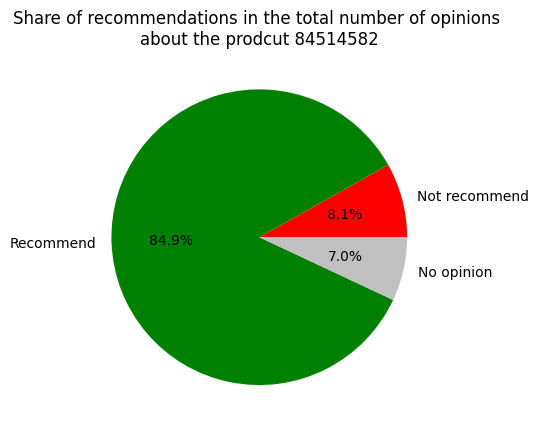

In [74]:
recommendations.plot.pie(
    label = "",
    labels = ["Not recommend","Recommend", "No opinion"],
    colors =  ["red", "green", "silver"],
    autopct = lambda v: f"{v:.1f}%" if v > 0 else "", 
    title = f"Share of recommendations in the total number of opinions \nabout the prodcut {product_id}"
)    
plt.show()